# Exercises: Variance
By Christopher van Hoecke, Maxwell Margenot, and Delaney Mackenzie

## Lecture Link :
https://www.quantopian.com/lectures/variance

### IMPORTANT NOTE:
This lecture corresponds to the Variance lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

-----

In [1]:
# Useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data:

In [2]:
X = np.random.randint(100, size = 100)

---

# Exercise 1:
Using the skills aquired in the lecture series, find the following parameters of the list X above:
- Range
- Mean Absolute Deviation
- Variance and Standard Deviation
- Semivariance and Semideviation
- Target variance (with B = 60)

In [3]:
# Range of X
range_X = np.ptp(X)

## Your code goes here
print('Range of X: %s' %(range_X))

Range of X: 99


In [4]:
# Mean Absolute Deviation
# First calculate the value of mu (the mean)

mu = np.mean(X)

abs_dispersion = [np.abs(mu - x) for x in X]
MAD = np.sum(abs_dispersion)/len(abs_dispersion)


print ('Mean absolute deviation of X:', MAD)

Mean absolute deviation of X: 25.7756


In [5]:
# Variance and standard deviation

## Your code goes here

print('Variance of X:',  np.var(X))
print('Standard deviation of X:', np.std(X))

Variance of X: 901.6915999999999
Standard deviation of X: 30.02818009803458


In [6]:
# Semivariance and semideviation

lows = [e for e in X if e <= mu]

semivar = np.sum( (lows - mu) ** 2 ) / len(lows)


print('Semivariance of X:',semivar)
print('Semideviation of X:',np.sqrt(semivar))

Semivariance of X: 806.5582039215686
Semideviation of X: 28.39996837888325


In [7]:
# Target variance
B = 66
## Your code goes here

lows_B = [e for e in X if e <= B]
semivar_B = sum(map(lambda x: (x - B)**2,lows_B))/len(lows_B)

print('Target semivariance of X:',semivar_B)
print('Target semideviation of X:',np.sqrt(semivar_B))

Target semivariance of X: 1709.64
Target semideviation of X: 41.34779316964813


---

# Exercise 2:
Using the skills aquired in the lecture series, find the following parameters of prices for AT&T stock over a year:
- 30 days rolling variance
- 15 days rolling Standard Deviation

In [10]:
import yfinance as yf
import datetime

start = datetime.datetime(2016,1,1)
end = datetime.datetime(2017,1,1)
att = yf.download('T', start = start, end = end)
att.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.740181,25.944109,25.679758,25.944109,13.899072,42076058
2016-01-05,25.944109,26.200907,25.770393,26.125378,13.996187,40656465
2016-01-06,25.543806,25.838369,25.468279,25.725077,14.039685,35631223
2016-01-07,25.392750,25.755287,25.309668,25.309668,13.812968,46487494
2016-01-08,25.506042,25.649548,25.234138,25.332327,13.825334,37192219


In [11]:
att = att['Open']

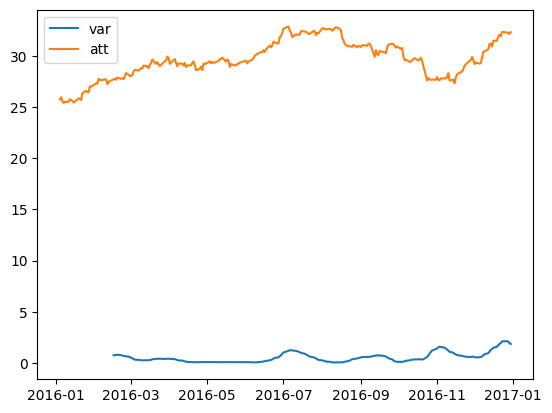

In [15]:
# Rolling variance
var_30 = att.rolling(window=30).var()

import matplotlib.pyplot as plt
plt.plot(var_30.index, var_30.values)
plt.plot(att.index, att.values)
plt.legend(['var','att'])

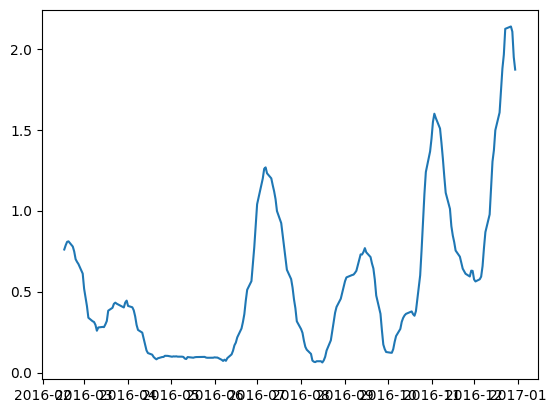

In [16]:
plt.plot(var_30.index, var_30.values)

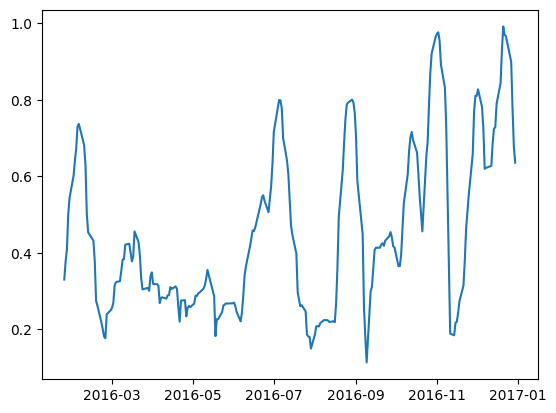

In [18]:
# Rolling standard deviation

std_15 = att.rolling(window=15).std()
plt.plot(std_15.index, std_15.values)

---

# Exercise 3 :
The portfolio variance is calculated as

$$\text{VAR}_p = \text{VAR}_{s1} (w_1^2) + \text{VAR}_{s2}(w_2^2) + \text{COV}_{S_1, S_2} (2 w_1 w_2)$$

Where $w_1$ and $w_2$ are the weights of $S_1$ and $S_2$.

Find values of $w_1$ and $w_2$ to have a portfolio variance of 50.

In [19]:
asset1 = yf.download('AAPL', start=start, end=end)['Open']
asset2 = yf.download('XLF', start=start, end=end)['Open']

cov = np.cov(asset1, asset2)[0,1]

w1 = 0.6 # desired portfolio weight
w2 = 1 - w1

v1 = np.var(asset1)
v2 = np.var(asset2)

pvariance = (w1**2)*v1+(w2**2)*v2+(2*w1*w2)*cov

print('Portfolio variance: ', pvariance)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Portfolio variance:  2.7107720284148096


---

Congratulations on completing the Variance exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*